In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections

In [2]:
n_tweets = 5021
n_participants = 2000
tweets_per_person = 50

tweets = {i:[] for i in range(0,n_tweets)} # We can replace this with a list of the tweets themselves (or tweet IDs)
participants = {i:[] for i in range(0,n_participants)}

tweets_complete = {}
participants_complete = {}

sample_quota_each = int(n_participants*tweets_per_person/n_tweets) # or replace with an appropriate number if desired
# i.e. maybe we want each tweet seen a minimum of 5 times.
    

### Phase one: 
Ensure each tweet is seen at least enough to meet the quota set above

In [3]:
for tweet in range(n_tweets):
    random_tweet = np.random.choice(list(tweets.keys())) # start with a random tweet
    
    for i in range(sample_quota_each): # We need to assign this tweet to the quota number of people
        random_participant = np.random.choice(list(participants.keys()))
        while random_tweet in participants.get(random_participant, []):   # If this randomly selected person has already been assigned this tweet...
            random_participant = np.random.choice(list(participants.keys())) # Find a new person
        participants.setdefault(random_participant, []).append(random_tweet)
        if len(participants.get(random_participant, [])) >= tweets_per_person: # Remove people from the sample list if they have the max number we want anyone to answer
            participants_complete[random_participant] = participants[random_participant]
            del participants[random_participant]
        tweets.setdefault(random_tweet, []).append(random_participant)    
    
    tweets_complete[random_tweet] = tweets[random_tweet]
    del tweets[random_tweet]
    

### Phase two: 
Since some people have been assigned fewer questions than planned, we can randomly assign them more until they have enough

In [4]:
for person in participants:
    n_missing = tweets_per_person - len(participants.get(person, []))
    added_tweets = list(np.random.choice(list(tweets_complete.keys()), n_missing, replace=False))
    participants.setdefault(person, []).extend(added_tweets)
    for each in added_tweets:
        tweets_complete.setdefault(each, []).append(person)
    participants_complete[person] = participants[person]
    

In [5]:
output = pd.DataFrame(sorted(participants_complete.items()), columns = ("Participant_ID", "tweets_assigned"))
#output.to_csv("sample_results.csv")

Here is out final output: 

In [92]:
output

,Participant_ID,tweets_assigned
0,0,"[2048, 3582, 3003, 1234, 2893, 909, 4722, 1965..."
1,1,"[1867, 4710, 1097, 4969, 887, 768, 2221, 2598,..."
2,2,"[5009, 3224, 561, 3972, 2716, 1631, 2146, 4367..."
3,3,"[2399, 804, 1705, 1908, 306, 4763, 4957, 3341,..."
4,4,"[3610, 4710, 2234, 2104, 281, 472, 1372, 3989,..."
...,...,...
1995,1995,"[222, 384, 44, 3084, 4064, 4336, 2636, 3010, 2..."
1996,1996,"[3288, 3964, 886, 4143, 802, 1890, 3647, 4973,..."
1997,1997,"[4956, 627, 3152, 1651, 2242, 3131, 4723, 2658..."
1998,1998,"[3874, 4562, 1402, 313, 4120, 699, 113, 2713, ..."


In [6]:
all_sampled = []
_ = [all_sampled.extend(output['tweets_assigned'][i]) for i in range(len(output))]

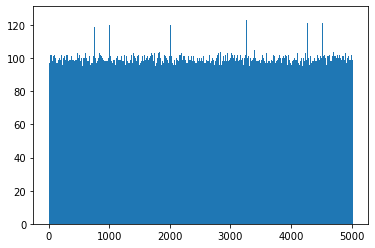

In [7]:
a = np.hstack(all_sampled)
_ = plt.hist(a, bins=1000)

Sampling is done evenly

In [8]:
counter = collections.Counter(all_sampled)

In [9]:
most_common = counter.most_common(1)[0]
least_common = counter.most_common()[-1:][0]
print("Tweet most frequently sampled: ", most_common[0], " was sampled ", most_common[1], "times")
print("Tweet least frequently sampled: ", least_common[0], " was sampled ", least_common[1], "times")


Tweet most frequently sampled:  643  was sampled  26 times
Tweet least frequently sampled:  447  was sampled  19 times
